# Step 4: Visualizations

In [103]:
import sys
import json
import csv
import yaml

import pandas as pd
import numpy as np

import datetime;

import matplotlib as mpl
import matplotlib.pyplot as plt

import time
from datetime import datetime

import pprint

import os
from dotenv import load_dotenv

import psycopg2
from sqlalchemy import create_engine, text as sql_text

sys.path.append('/Users/Nfaith21/Documents/ECS 116 - Misc/DISC_5_FILES/benchmarking/')
import util_actual_main as util

# Step 3a plots - listings_join_reviews.json

In [104]:
with open('/Users/Nfaith21/Documents/ECS 116 - Misc/listings_join_reviews.json', 'r') as file:
    data_listings = json.load(file)

print(json.dumps(data_listings, indent=4, sort_keys=True))

{
    "q_listings_join_reviews_2009": {
        "__": {
            "avg": 8.1706,
            "count": 50,
            "max": 12.5871,
            "min": 7.0492,
            "std": 1.0144,
            "timestamp": "2024-05-21-21:53:21"
        },
        "__datetime_in_reviews__": {
            "avg": 0.0069,
            "count": 50,
            "max": 0.0113,
            "min": 0.0057,
            "std": 0.0007,
            "timestamp": "2024-05-21-21:53:32"
        },
        "__datetime_in_reviews__id_in_listings__": {
            "avg": 0.0076,
            "count": 50,
            "max": 0.0289,
            "min": 0.006,
            "std": 0.0031,
            "timestamp": "2024-05-21-22:00:10"
        },
        "__id_in_listings__": {
            "avg": 7.7272,
            "count": 50,
            "max": 9.5033,
            "min": 6.8839,
            "std": 0.7081,
            "timestamp": "2024-05-21-21:59:58"
        }
    },
    "q_listings_join_reviews_2010": {
        "__": 

In [105]:
def rename_keys(d):
    return {k.split('_')[-1] : v for k, v in d.items()}
renamed_data_listings = rename_keys(data_listings)

In [106]:
pp = pprint.PrettyPrinter(indent=4)

pp.pprint(renamed_data_listings)

{   '2009': {   '__': {   'avg': 8.1706,
                          'count': 50,
                          'max': 12.5871,
                          'min': 7.0492,
                          'std': 1.0144,
                          'timestamp': '2024-05-21-21:53:21'},
                '__datetime_in_reviews__': {   'avg': 0.0069,
                                               'count': 50,
                                               'max': 0.0113,
                                               'min': 0.0057,
                                               'std': 0.0007,
                                               'timestamp': '2024-05-21-21:53:32'},
                '__datetime_in_reviews__id_in_listings__': {   'avg': 0.0076,
                                                               'count': 50,
                                                               'max': 0.0289,
                                                               'min': 0.006,
                                

In [107]:
def extract_value(data, val):
    values = {}
    for year, details in data.items():
        values[year] = {}
        for key, metrics in details.items():
            if val in metrics:
                values[year][key] = metrics[val]
    return values

In [108]:
def extract_avg_values(data):
    avg_values = {}
    for year, details in data.items():
        avg_values[year] = {}
        for key, metrics in details.items():
            if 'avg' in metrics:
                avg_values[year][key] = metrics['avg']
    return avg_values

avg_values = extract_avg_values(renamed_data_listings)

pp.pprint(avg_values)

key_labels = {
    "__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__datetime_in_reviews__id_in_listings__": "datetime_and_id_index"
}

data_for_df = {label: [] for label in key_labels.values()}
data_for_df['Year'] = sorted(avg_values.keys())

for year in data_for_df['Year']:
    for key, label in key_labels.items():
        data_for_df[label].append(avg_values[year].get(key, None))

listings_avg_df = pd.DataFrame(data_for_df)

listings_avg_df.set_index('Year', inplace=True)

print(listings_avg_df)

{   '2009': {   '__': 8.1706,
                '__datetime_in_reviews__': 0.0069,
                '__datetime_in_reviews__id_in_listings__': 0.0076,
                '__id_in_listings__': 7.7272},
    '2010': {   '__': 7.6383,
                '__datetime_in_reviews__': 0.0076,
                '__datetime_in_reviews__id_in_listings__': 0.0075,
                '__id_in_listings__': 7.9397},
    '2011': {   '__': 7.2242,
                '__datetime_in_reviews__': 0.0098,
                '__datetime_in_reviews__id_in_listings__': 0.0088,
                '__id_in_listings__': 7.0419},
    '2012': {   '__': 7.1225,
                '__datetime_in_reviews__': 0.0115,
                '__datetime_in_reviews__id_in_listings__': 0.0104,
                '__id_in_listings__': 7.193},
    '2013': {   '__': 7.1786,
                '__datetime_in_reviews__': 0.0163,
                '__datetime_in_reviews__id_in_listings__': 0.0142,
                '__id_in_listings__': 6.6182},
    '2014': {   '__': 6.89

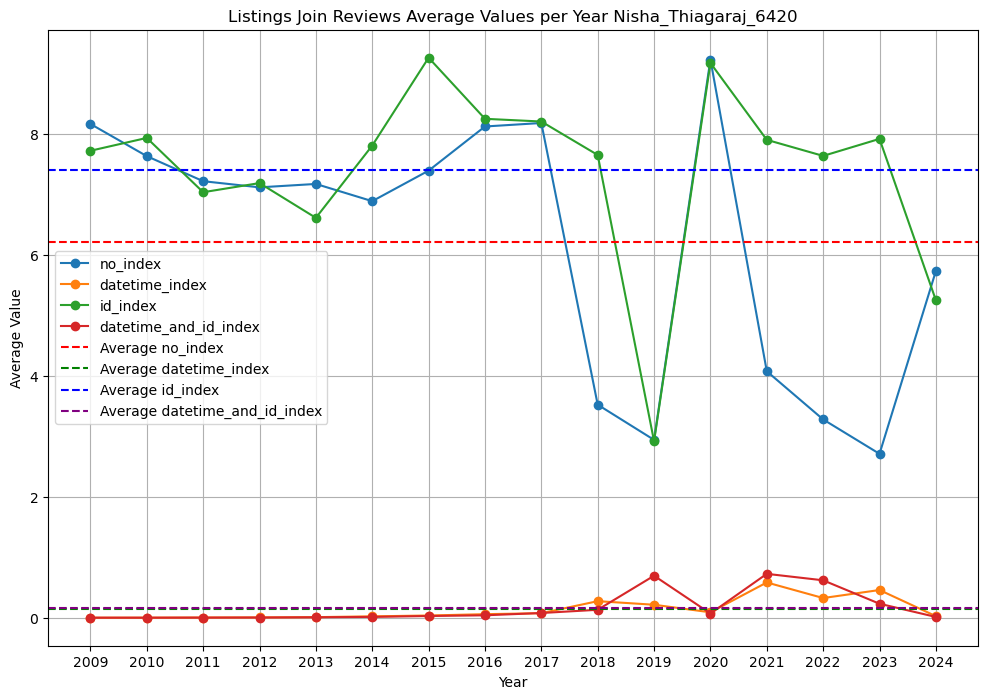

In [109]:
plt.figure(figsize=(12, 8))

for col in listings_avg_df.columns:
    plt.plot(listings_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(listings_avg_df.columns):
    avg = listings_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Listings Join Reviews Average Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

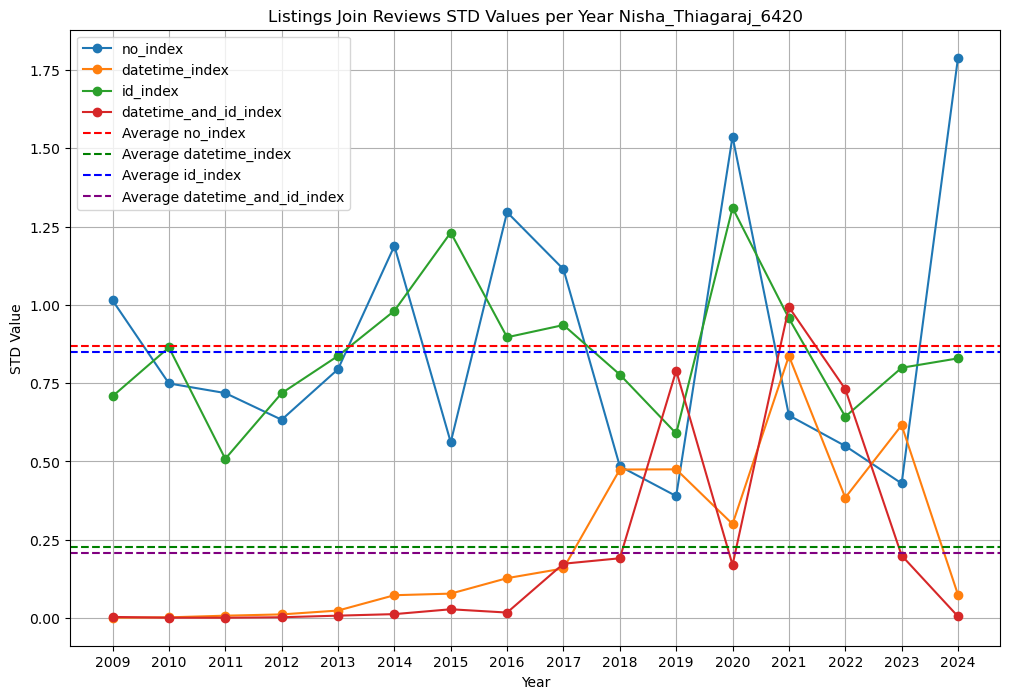

In [122]:
listings_std_values = extract_value(renamed_data_listings, 'std')
listings_std_df = pd.DataFrame(listings_std_values).T
listings_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__datetime_in_reviews__id_in_listings__": "datetime_and_id_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in listings_std_df.columns:
    plt.plot(listings_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(listings_std_df.columns):
    avg = listings_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Listings Join Reviews STD Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Step 3b plots - text_search_query.json

In [111]:
text_search_info = util.fetch_perf_data('text_search_query.json')

In [112]:
def text_search_extract_value(data, word, value):
    values = {}
    for key, details in data.items():
        wd, year = key.split('_')
        if wd == word:
            values[year] = {}
            for k, metrics in details.items():
                if value in metrics:
                    values[year][k] = metrics[value]
    return values

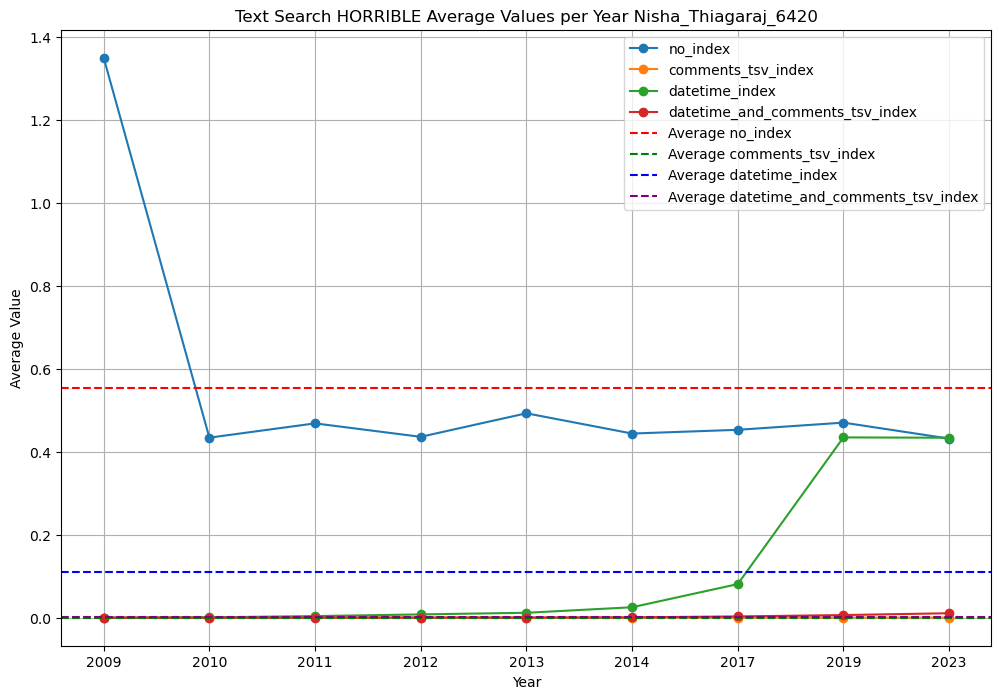

In [113]:
horrible_avg = text_search_extract_value(text_search_info, 'horrible', 'avg')
horrible_avg_df = pd.DataFrame(horrible_avg).T
horrible_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in horrible_avg_df.columns:
    plt.plot(horrible_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(horrible_avg_df.columns):
    avg = horrible_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search HORRIBLE Average Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

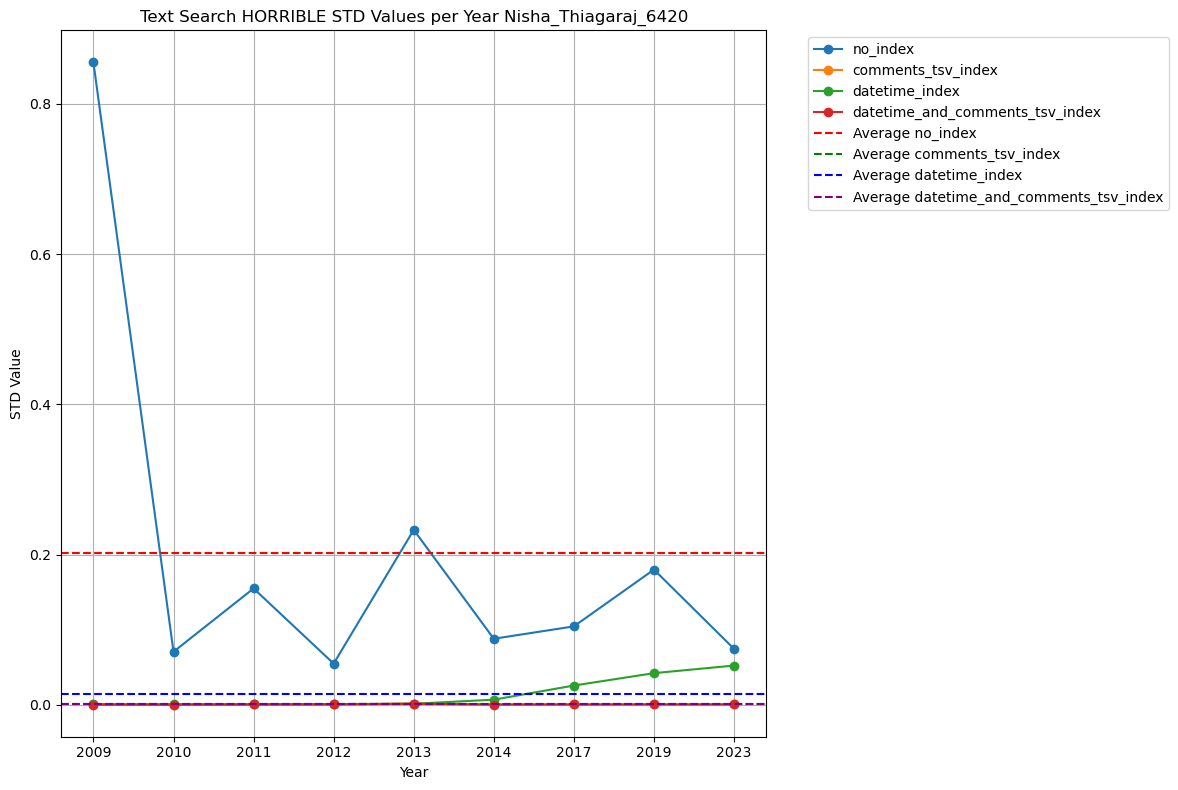

In [114]:
horrible_std_values = text_search_extract_value(text_search_info, 'horrible', 'std')
horrible_std_df = pd.DataFrame(horrible_std_values).T
horrible_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in horrible_std_df.columns:
    plt.plot(horrible_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(horrible_std_df.columns):
    avg = horrible_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search HORRIBLE STD Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

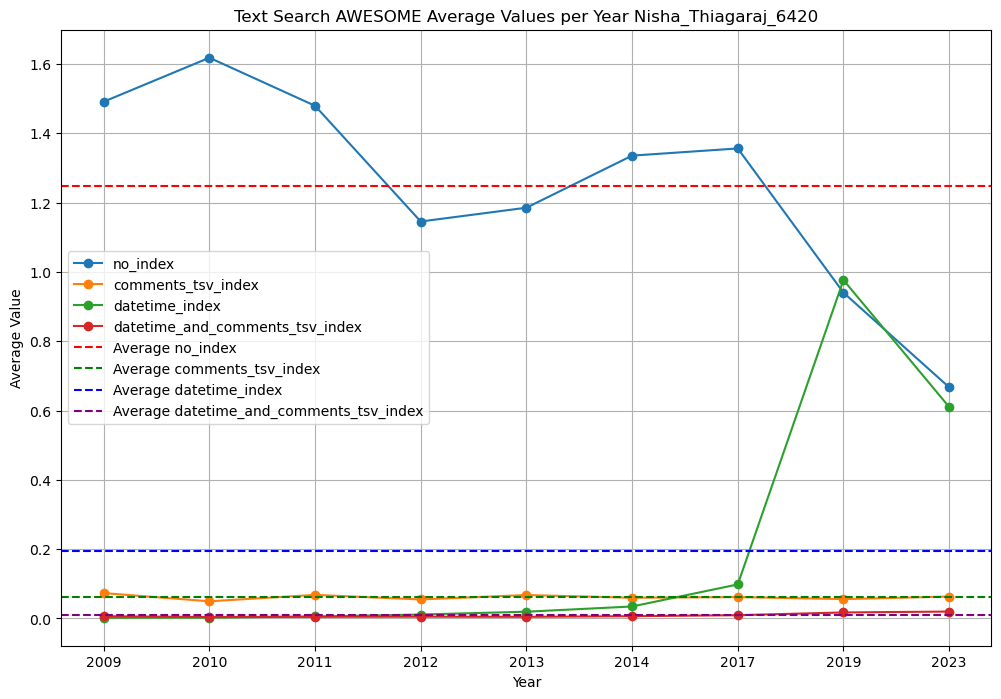

In [115]:
awesome_avg_values = text_search_extract_value(text_search_info, 'awesome', 'avg')
awesome_avg_df = pd.DataFrame(awesome_avg_values).T
awesome_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in awesome_avg_df.columns:
    plt.plot(awesome_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(awesome_avg_df.columns):
    avg = awesome_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search AWESOME Average Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

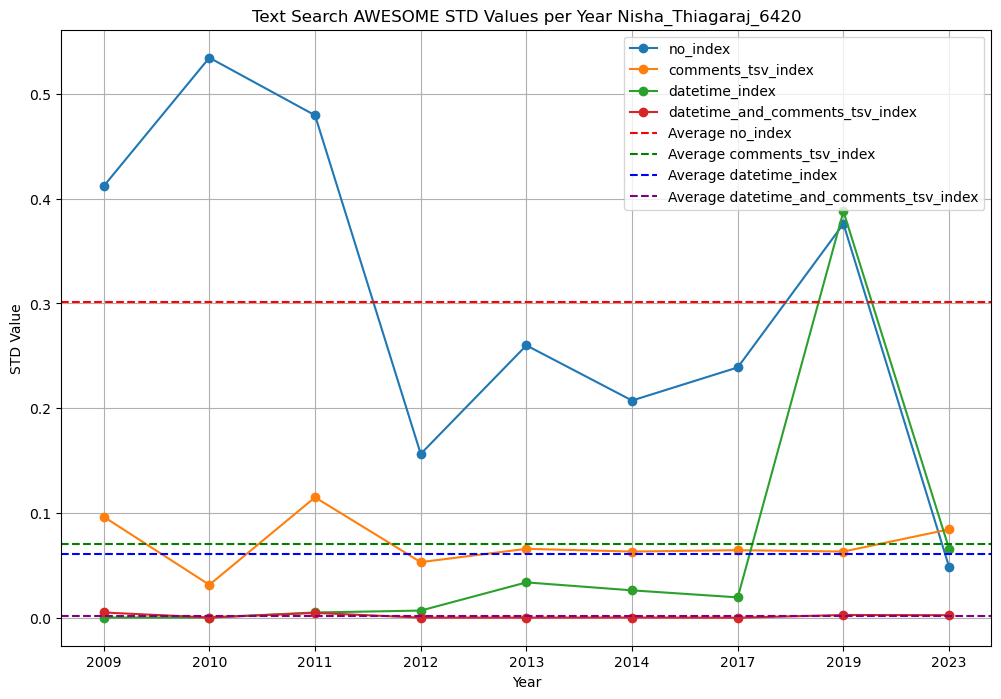

In [116]:
awesome_std_values = text_search_extract_value(text_search_info, 'awesome', 'std')
awesome_std_df = pd.DataFrame(awesome_std_values).T
awesome_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in awesome_std_df.columns:
    plt.plot(awesome_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(awesome_std_df.columns):
    avg = awesome_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search AWESOME STD Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

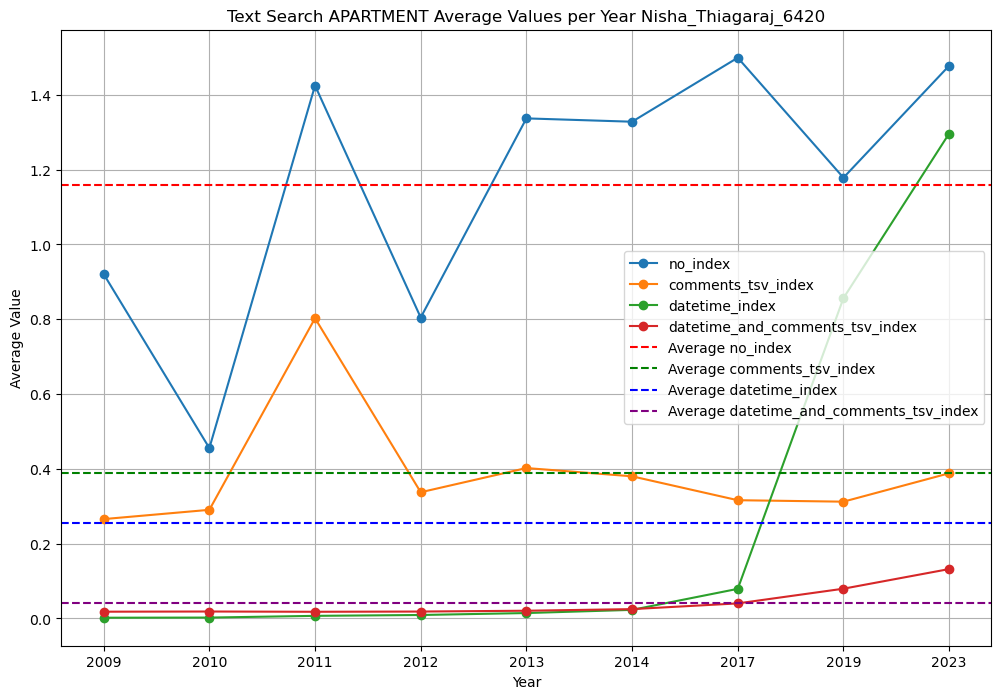

In [117]:
apartment_avg_values = text_search_extract_value(text_search_info, 'apartment', 'avg')
apartment_avg_df = pd.DataFrame(apartment_avg_values).T
apartment_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in apartment_avg_df.columns:
    plt.plot(apartment_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(apartment_avg_df.columns):
    avg = apartment_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search APARTMENT Average Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

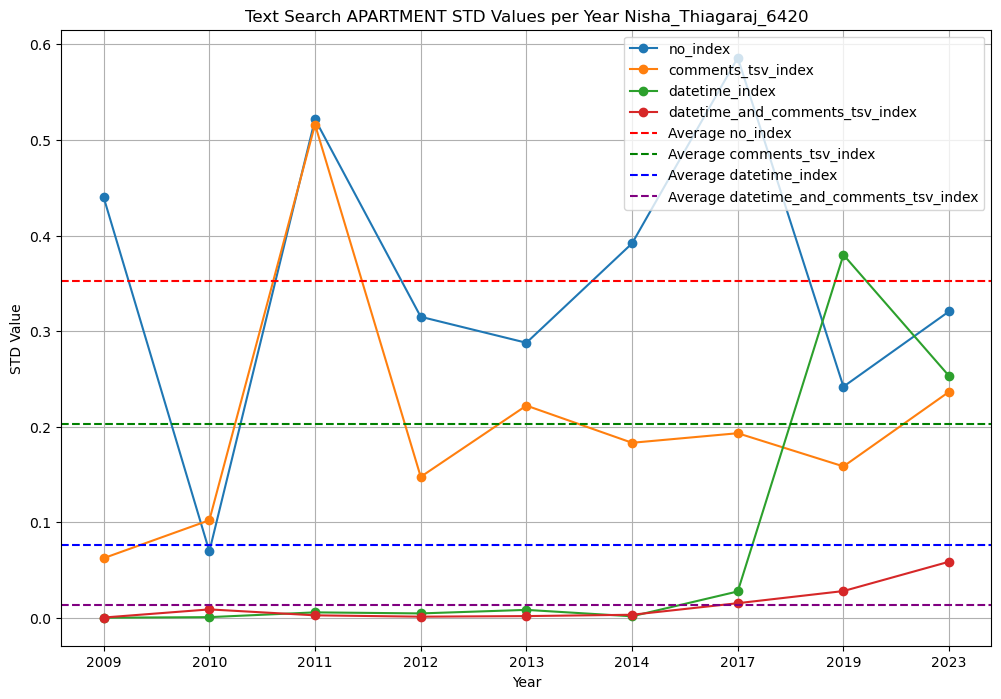

In [118]:
apartment_std_values = text_search_extract_value(text_search_info, 'apartment', 'std')
apartment_std_df = pd.DataFrame(apartment_std_values).T
apartment_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in apartment_std_df.columns:
    plt.plot(apartment_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(apartment_std_df.columns):
    avg = apartment_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search APARTMENT STD Values per Year Nisha_Thiagaraj_6420')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Step 3c plots - update_datetimes_query.json

In [119]:
update = util.fetch_perf_data('update_datetimes_query.json')
rename_updates = rename_keys(update)
order_of_axis = ['New Springville', 'Fort Hamilton', 'Long Island City', 'Bedford-Stuyvesant', 'Staten Island', 'Bronx', 'Queens', 'Manhattan']

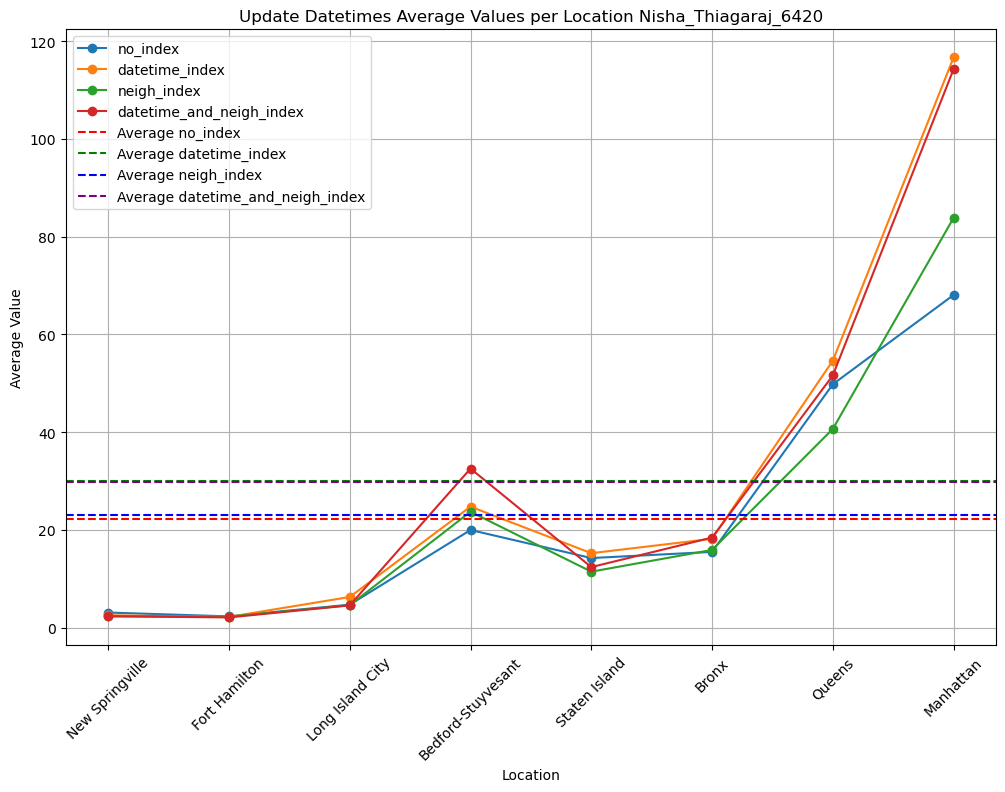

In [126]:
update_avg = extract_value(rename_updates, 'avg')
update_avg_df = pd.DataFrame(update_avg).T
update_avg_df = update_avg_df.reindex(order_of_axis)
update_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__neigh_group_in_listings__": "neigh_index",
    "__datetime_in_reviews__neigh_in_listings__": "datetime_and_neigh_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in update_avg_df.columns:
    plt.plot(update_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(update_avg_df.columns):
    avg = update_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Update Datetimes Average Values per Location Nisha_Thiagaraj_6420')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

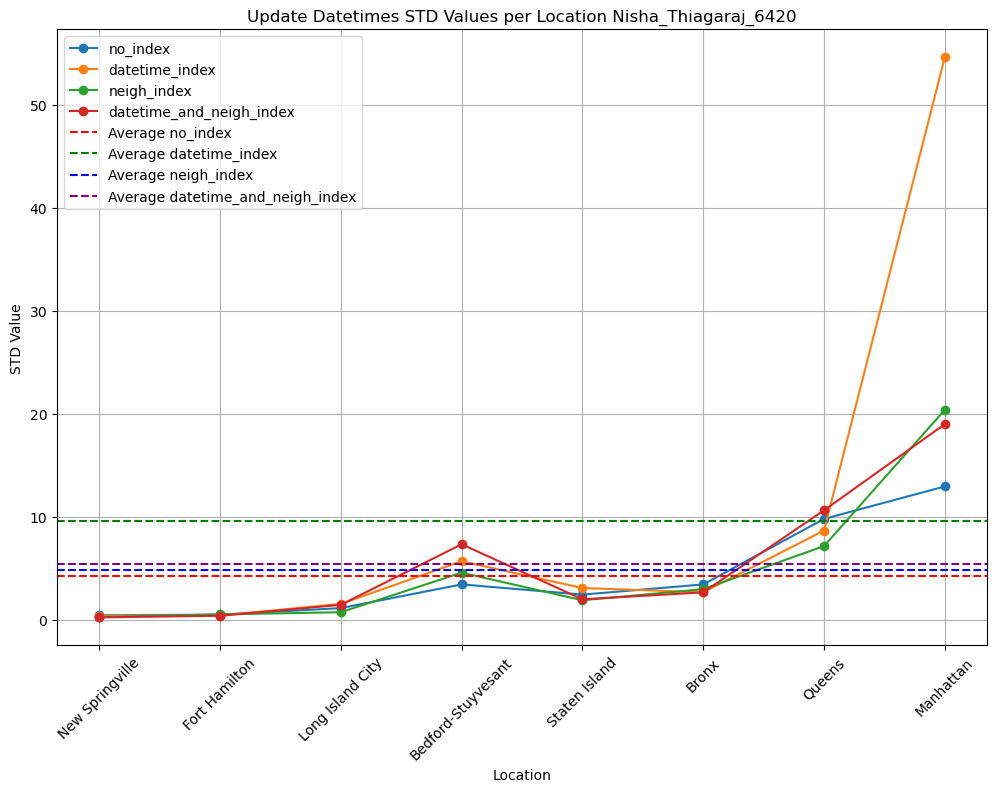

In [125]:
update_std = extract_value(rename_updates, 'std')
update_std_df = pd.DataFrame(update_std).T
update_std_df = update_std_df.reindex(order_of_axis)
update_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__neigh_group_in_listings__": "neigh_index",
    "__datetime_in_reviews__neigh_in_listings__": "datetime_and_neigh_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

for col in update_std_df.columns:
    plt.plot(update_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(update_std_df.columns):
    avg = update_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Update Datetimes STD Values per Location Nisha_Thiagaraj_6420')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()